<a href="https://colab.research.google.com/github/heitornolla/SAD-Inferencia-em-Regressao-Multipla/blob/main/SAD_Infer%C3%AAncia_em_Regress%C3%A3o_Linear_M%C3%BAltipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelos de Regressão Linear e Inferência**

É bastante fácil fazermos inferências em modelos de regressão simples. Se o modelo estiver correto, com um bom nível de confiabilidade, as variáveis se influenciam diretamente.

Para estes exemplos a seguir, continuaremos com códigos em Python. Como o foco é a Regressão e a Inferência, e não o código em si, explicaremos o que cada código faz o como interpretar os resultados.

Para vermos um exemplo mais real, escolhemos um modelo que discute a performance de alunos no Ensino Médio. Essa base de dados pode ser acessada [aqui](https://archive.ics.uci.edu/dataset/320/student+performance).

Esse dataset é bastante útil para tarefas de predições e inferência usando diversos algoritmos.

Para hoje, iremos explorar os dados, inferirindo mais relações entre variáveis. Com essa base de dados, poderemos exemplificar conceitos essenciais à Inferência, como métricas de avaliação, Variáveis Dummy e Multicolinearidade.

Os dados desse banco incluem notas dos alunos, questões demográficas e sócio-econômicas, e foram coletadas por meio de questionários nas escolas.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data_por = pd.read_csv('student-por.csv',sep=';')
data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## **Análise Exploratória de Dados, ou EDA (Exploratory Data Analysis)**

Obtendo um banco de dados maior e mais complexo, precisamos, primeiro, entender os dados e sobre o que se tratam.

A análise exploratória de dados é uma abordagem fundamental na área da ciência de dados. Ela envolve a exploração e o entendimento dos dados. Aqui, buscamos compreender os dados que estamos analisando, e identificar possíveis correlações.

In [ ]:
# Verificando todos os atributos:
data_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
# Checa se existe mais de uma escola:
data_por[['school','G3']].groupby(['school'], as_index=False).count()

,school,G3
0,GP,423
1,MS,226


Identificamos que 423 alunos pertencem a "GP" e 226 a "MS". Observe no gráfico abaixo:

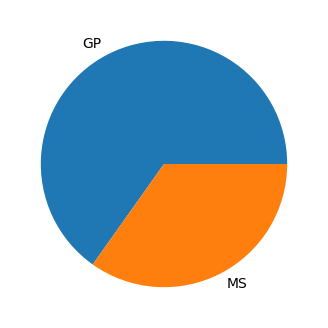

In [ ]:
plt.rcParams['figure.figsize'] = [5, 4]
school_counts = data_por['school'].value_counts()
plt.pie(school_counts, normalize=True, labels = school_counts.index)
plt.show()

Ainda assim, é importante que nosso modelo sirva para alunos de ambas as escolas.

### Inferências:

Com os dados pré-analisados, temos uma noção básica de que tipo de informações estamos vendo. Agora, podemos partir para inferências. Algumas questões que talvez sejam interessantes sabermos são:


1.   Alunos mais velhos tendem a terem melhores ou piores notas?
2.   O tamanho da família do aluno tem alguma influência em suas notas?
3.   Os empregos dos pais do aluno tem alguma influência em suas notas?
4.   O tempo que um aluno estuda tem alguma influência em suas notas?
5.   A escola do aluno importa?
6.   Mais tempo livre resultou em notas melhores ou piores?

Para testar essas inferências, criaremos uma base *data_corr*, que copia os exatos dados de nossa base atual, para que possamos manipulá-la, sem alterar a base original. Nela, avaliaremos a **correlação** entre algumas variáveis.

A correlação varia de -1 a 1, onde:

*   1 indica uma correlação perfeita positiva (quando uma variável aumenta, a outra também aumenta de maneira linear).
*  -1 indica uma correlação perfeita negativa (quando uma variável aumenta, a outra diminui de maneira linear).
*   0 indica nenhuma correlação linear.





In [ ]:
data_corr = data_por.copy()

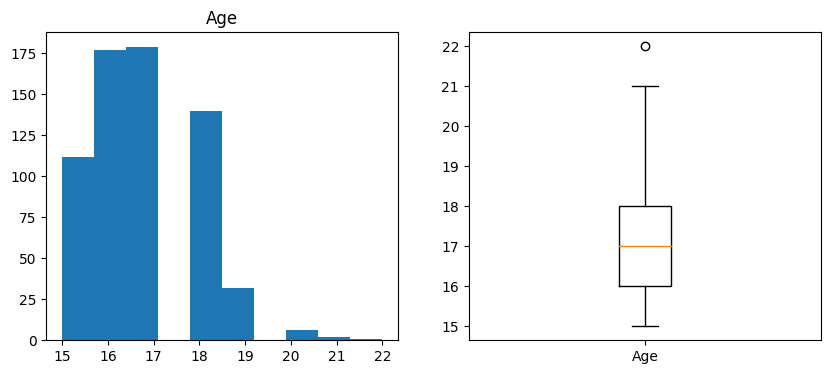

In [ ]:
# Observe, por meio deste gráfico, a distribuição das idades dos alunos:

plt.rcParams['figure.figsize'] = [10, 4]
plt.subplot(1, 2, 1)
plt.title('Age')
plt.hist(data_corr['age'])
plt.subplot(1, 2, 2)
plt.boxplot(data_corr['age'], labels=['Age'])
plt.show()

Vemos que a maioria dos alunos estão entre 15 a 19 anos, uma idade normal para alunos de Ensino Médio. Temos, aparentemente, um outlier de 22 anos, e alguns alunos entre 20 a 21 anos. Isso seria plausível, pensando que são, provavelmente, alunos que repetiram de ano.

In [ ]:
# Vamos analisar a correlação entre Idade e Nota Final:

age_corr = data_corr[['age', 'G3']].corr()['G3'].loc['age']
print('Correlação entre idade e nota final: ', age_corr)

Correlação entre idade e nota final:  -0.10650539063847737


A correlação é negativa, e bastante fraca. Isso não é surpreendente, se pensarmos que é provável que alunos de 20+ anos foram retidos por terem notas ruins.

In [ ]:
# Influência do tamanho da família do aluno em sua performance:
data_por[['famsize','G1','G2','G3']].groupby(['famsize'], as_index=False).mean().sort_values(by='G3', ascending=False)

,famsize,G1,G2,G3
1,LE3,11.598958,11.744792,12.130208
0,GT3,11.315098,11.496718,11.811816


In [ ]:
data_corr['famsize'] = data_corr['famsize'].astype('category').cat.codes
famsize_corr = data_corr[['famsize', 'G3']].corr()['G3'].loc['famsize']
print('Correlação entre tamanho da família e nota final: ', famsize_corr)

Correlação entre tamanho da família e nota final:  0.04501636801724957


#### Entenda a distribuiçao:
LE3: "Less than 3". No caso, menos que 3. Alunos com uma família com menos de 3 membros parecem ter notas levemente maiores que alunos com famílias com mais de 3 membros.

In [ ]:
# Influência do emprego do pai nas notas do aluno:
data_por[['Fjob','G1','G2','G3']].groupby(['Fjob'], as_index=True).mean().sort_values(by='G3', ascending=False)

,G1,G2,G3
Fjob,,,
teacher,13.055556,13.333333,13.583333
health,12.043478,12.260870,12.565217
other,11.362398,11.542234,11.891008
services,11.292818,11.370166,11.629834
at_home,10.404762,10.785714,11.428571


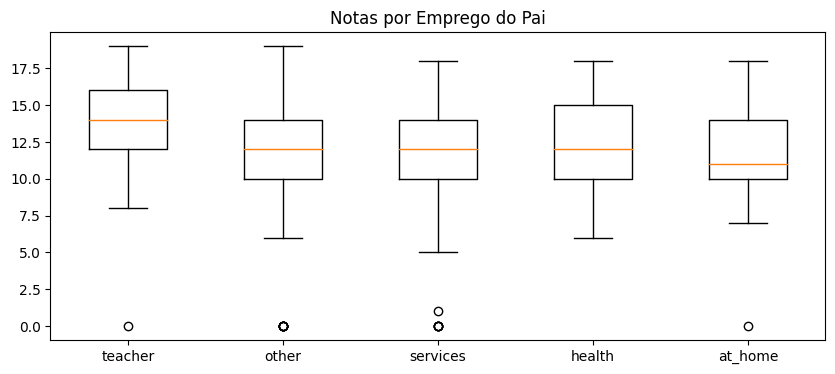

In [ ]:
labels = []
plots = []
for job in data_corr['Fjob'].unique():
    labels.append(job)
    plots.append(data_corr[data_corr['Fjob'] == job]['G3'])
plt.title('Notas por Emprego do Pai')
plt.boxplot(plots, labels = labels)
plt.show()

In [ ]:
# Influência do emprego da mãe nas notas do aluno:
data_por[['Mjob','G1','G2','G3']].groupby(['Mjob'], as_index=True).mean().sort_values(by='G3', ascending=False)

,G1,G2,G3
Mjob,,,
teacher,12.555556,12.694444,13.138889
health,12.395833,12.645833,13.062500
services,11.610294,11.720588,12.147059
other,11.275194,11.426357,11.670543
at_home,10.451852,10.711111,11.044444


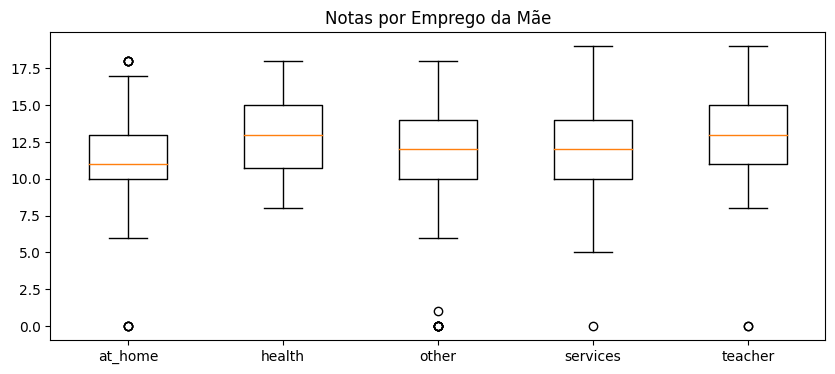

In [ ]:
labels = []
plots = []
for job in data_corr['Mjob'].unique():
    labels.append(job)
    plots.append(data_corr[data_corr['Mjob'] == job]['G3'])
plt.title('Notas por Emprego da Mãe')
plt.boxplot(plots, labels = labels)
plt.show()

Com essa análise, fica claro que alunos com pais no campo da educação e saúde tendem a ter melhores notas.

In [ ]:
# Analise se pais estão vivos ou não:
data_por[['guardian','G1','G2','G3']].groupby(['guardian'], as_index=True).mean().sort_values(by='G3', ascending=False)

,G1,G2,G3
guardian,,,
father,11.784314,11.875817,12.202614
mother,11.389011,11.573626,11.896703
other,10.073171,10.390244,10.902439


Alunos com pais vivos tendem a ter melhores notas

In [ ]:
# Tempo de descolamento até a escola:
data_por[['traveltime','G1','G2','G3']].groupby(['traveltime'], as_index=False).mean().sort_values(by='G3', ascending=False)

,traveltime,G1,G2,G3
0,1,11.759563,11.907104,12.251366
1,2,11.046948,11.309859,11.577465
2,3,10.648148,10.814815,11.166667
3,4,10.375000,9.875000,10.875000


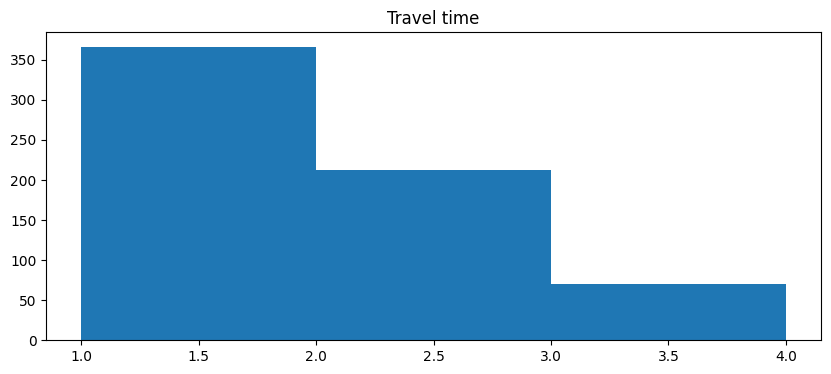

In [ ]:
# O quão longe da escola a maior parte dos alunos vive?

plt.title('Travel time')
plt.hist(data_corr['traveltime'], bins = [*range(1, 5)])
plt.show()

In [ ]:
# Observamos que a maior parte dos alunos vivem relatimente próximos da escola.
# Qual a correlação entre esses dados?

traveltime_corr = data_corr[['traveltime', 'G3']].corr(method='spearman')['G3'].loc['traveltime']
print('Correlaçã entre tempo de deslocamento e nota final: ', traveltime_corr)

Correlaçã entre tempo de deslocamento e nota final:  -0.14694771585602495


#### Entenda a representação:
- 1: Menos de 15 minutos
- 2: Entre 15 minutos e 30 min
- 3: Entre 30 minutos a 1 hora
- 4: Mais que 1 hora

Fica claro que alunos que precisam se deslocar por menos tempo até a escola tem maiores notas.

In [ ]:
# Analisando tempo de estudo:
data_por[['studytime','G1','G2','G3']].groupby(['studytime'], as_index=False).mean().sort_values(by='G3', ascending=False)

,studytime,G1,G2,G3
2,3,12.422680,12.793814,13.226804
3,4,12.771429,12.628571,13.057143
1,2,11.537705,11.662295,12.091803
0,1,10.504717,10.702830,10.844340


#### Entenda a representação:
- 1: Menos de 2 horas
- 2: Entre 2 horas e 5 horas
- 3: Entre 5 horas e 10 horas
- 4: Mais que 10 hr

É esperado que a correlação entre esses atributos seja maior. Observe:

In [ ]:
studytime_corr = data_corr[['studytime', 'G3']].corr()['G3'].loc['studytime']
print('Correlação entre horas de estudo e nota final: ', studytime_corr)

Correlação entre horas de estudo e nota final:  0.24978868999886306


Essa correlação ainda é bastante fraca. Isso pode significar, por exemplo, que alguns alunos mentiram nas respostas.

Há, seguramente, um viés por parte dos alunos em que pessoas alheias acreditem que passam diversas horas estudando.

In [ ]:
# Analisando o consumo semanal de álcool:
data_por[['Walc','G1','G2','G3']].groupby(['Walc'], as_index=True).mean().sort_values(by='G3', ascending=False)

,G1,G2,G3
Walc,,,
1,11.688259,11.951417,12.360324
2,11.746667,11.820000,12.260000
3,11.308333,11.500000,11.666667
4,10.655172,10.735632,11.034483
5,10.333333,10.444444,10.555556


In [ ]:
walc_corr = data_corr[['Walc', 'G3']].corr(method='spearman')['G3'].loc['Walc']
print('Correlação entre consumo de álcool aos finais de semana e nota final: ', walc_corr)

Correlação entre consumo de álcool aos finais de semana e nota final:  -0.17089524394497582


#### Entenda a representação:
Dados numéricos, ordenados de 1 – muito baixo a 5 – altíssimo.

Alunos que consomem menos álcool tem melhores notas.

In [ ]:
# Analisando a relação entre tempo livre e as notas dos alunos:
data_por[['freetime','G1','G2','G3']].groupby(['freetime'], as_index=True).mean().sort_values(by='G3', ascending=False)

,G1,G2,G3
freetime,,,
2,12.046729,12.233645,12.710280
3,11.509960,11.669323,12.059761
1,11.066667,11.444444,11.733333
4,11.247191,11.410112,11.713483
5,10.588235,10.661765,10.691176


Com essa análise, é aparente que alunos com horas medianas de tempo livre possuem notas melhores que os que tem muitas horas de tempo livre (4 a 5) ou poucas (1 ou menos).

## **Por que analisar essas correlações?**

Além de serem boas métricas para analisar a qualidade das inferências feitas, temos que entender uma questão: em bases de dados grandes como essa que estamos analisando, é difícil que todos os atributos tenham impactos reais no atributo que queremos prever.

Atributos como, por exemplo, a quantidade de tempo livre dos alunos e a quantidade de tempo que veem a amigos, provavelmente estão altamente correlacionados. Ou, atributos como gênero dos alunos e suas notas finais, provavelmente não estão correlacionados.

Analisar essas correlações nos ajuda a:

1.    Identificar de Relacionamentos Lineares, ajudando a perceber padrões nos dados e entender como as variáveis estão relacionadas.

2.    Selecionar Variáveis para Modelagem, contribuindo para um modelo mais simples e interpretação mais fácil.

3.    Identificar Multicolinearidade (será explicado adiante).

Gráficos de dispersão associados à análise de correlação podem proporcionar uma visualização direta dos padrões nos dados. Isso pode ajudar a identificar tendências, outliers e padrões não lineares. Observe, abaixo, o gráfico de correlação dos atributos que possuímos:

<ipython-input-28-ccb7ac299a17>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, dtype in categorical_cols.iteritems():


NameError: ignored

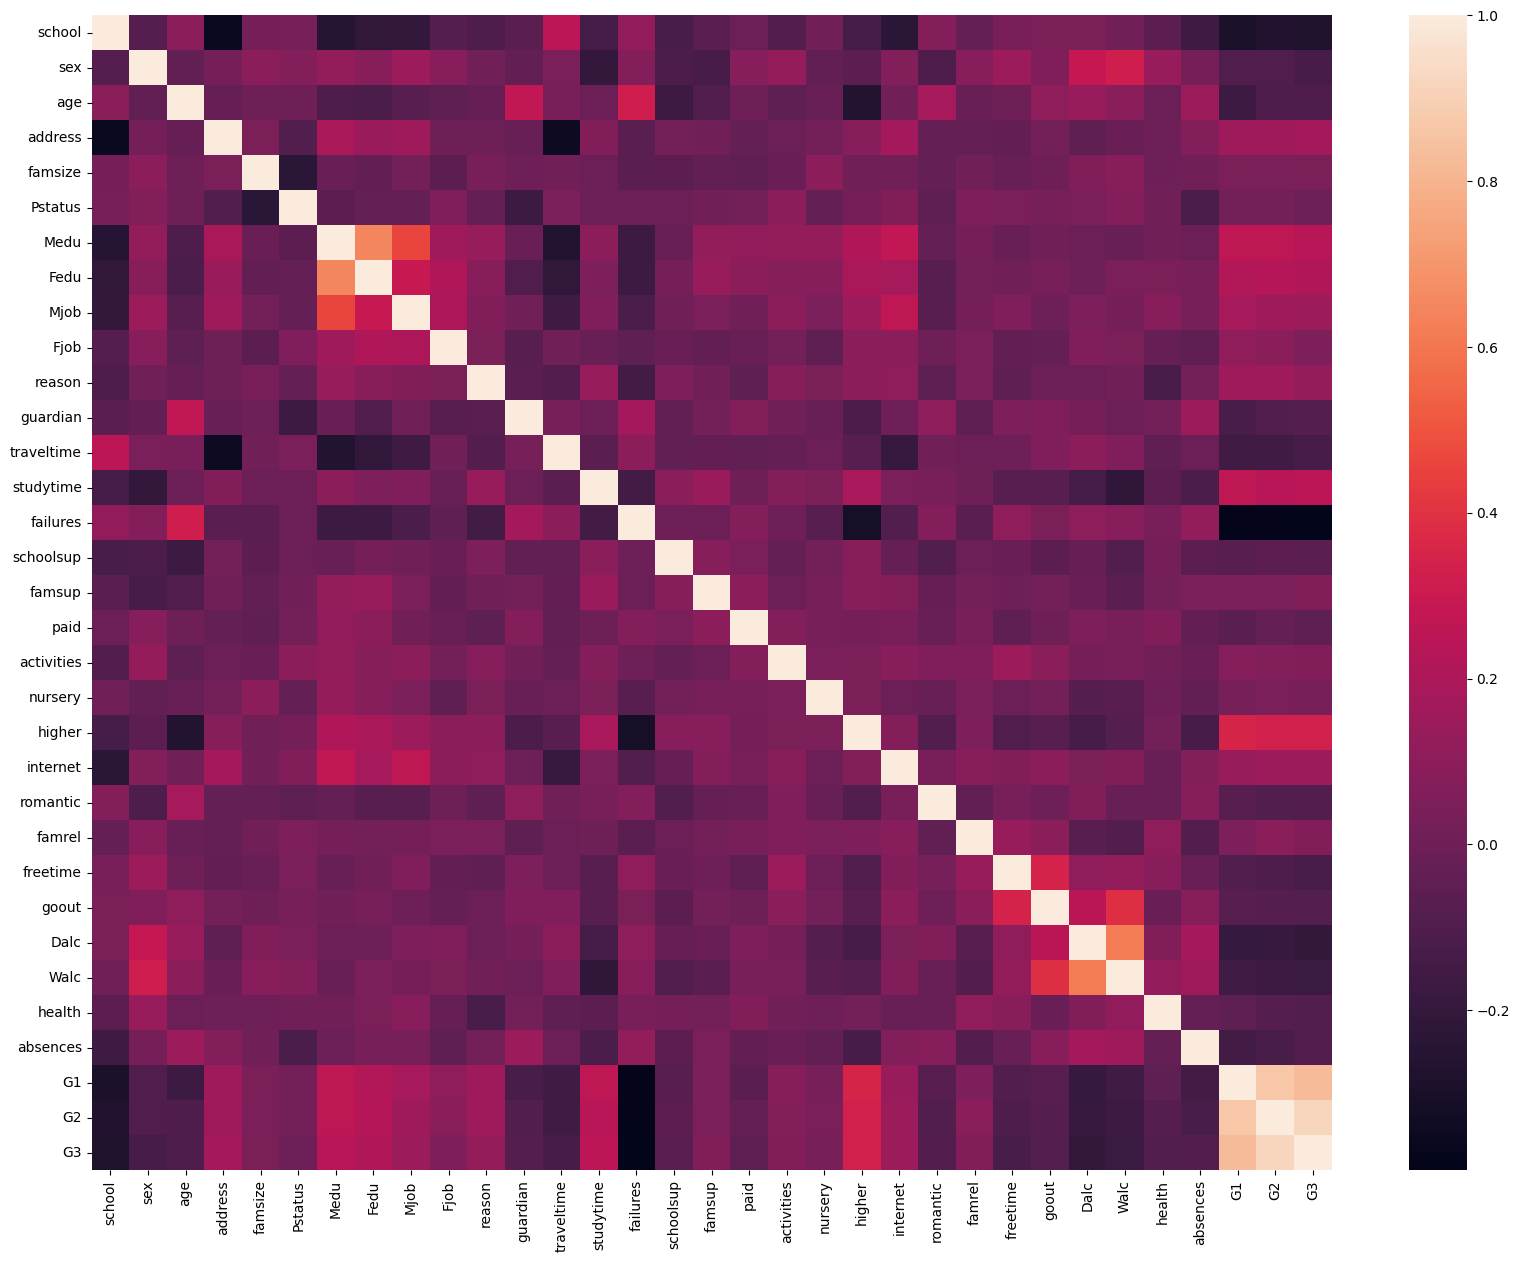

In [ ]:
categorical_cols = data_corr.dtypes[data_corr.dtypes == 'object']

for col, dtype in categorical_cols.iteritems():
    data_corr[col] = data_corr[col].astype('category').cat.codes

corr = data_corr.corr()
plt.rcParams['figure.figsize'] = [20, 15]
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

Tome um tempo para observar bem esse mapa, e entender o que ele significa e o que nos diz. Por ele, podemos observar diretamente diversas correlações, que resultam em inferências interessantes. Áreas mais claras significam maior correlação entre as variáveis.

Podemos observar que, por exemplo:

*   Existe uma correlação entre tempo livre e tempo gasto com amigos.
*   Existe uma correlação negativa entre consumo de álcool e tempo gasto estudando.

Use esse mapa para entender melhor os dados e fazer, você, suas próprias inferências. Mais relações podem ser inferidas a partir destes dados.

## Métrica R^2 e Variáveis Dummy
Dois fatores no código à seguir devem chamar a atenção: primeiramente, o resultado *R^2 Score*; depois, a linha

*X = pd.get_dummies(X, columns=['Pstatus', 'Fjob'], drop_first=True)*.

Esses itens serão explicados agora.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Supondo que 'data_por' seja o seu DataFrame
# Definindo as variáveis independentes (X) e a variável dependente (y)
X = data_por[['Medu', 'Fedu', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'Pstatus', 'Fjob']]

# Convertendo variáveis categóricas usando one-hot encoding
X = pd.get_dummies(X, columns=['Pstatus', 'Fjob'], drop_first=True)
y = data_por['G3']  # A variável que você está tentando prever

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Fazendo previsões nos dados de teste
y_pred = model.predict(X_test)

# Calculando o R^2
r2 = r2_score(y_test, y_pred)

# Exibindo o resultado
print(f'Pontuação de R^2 : {r2}')


Pontuação de R^2 : 0.8550904569250904


### **Métrica R^2 (lê-se R Quadrado)**

Como podemos saber se nossas inferências estão corretas? Como avaliaremos se nosso modelo é preciso? Para isso, temos a métrica R^2.

De maneira simples, o chamado coeficiente de determinação, comumente representado por R², mede a proporção da variabilidade na variável dependente que é explicada pelo modelo. Ele é essencial na inferência, mas pouco útil para predições.

Ele varia de 0 a 1, onde 0 indica que o modelo não explica nenhuma variabilidade e 1 indica que o modelo explica toda a variabilidade. Obtivemos, como pode ser observado acima, uma pontuação de 0.85, que é bastante boa.

Nesse caso, um R² mais alto indica um melhor ajuste do modelo aos dados, sugerindo que uma maior porcentagem da variação na variável dependente é capturada pelas variáveis independentes incluídas no modelo.

A qualidade do R^2 está relacionada à correlação entre as variáveis. A análise de correlações pode informar a escolha de variáveis para inclusão no modelo de regressão.

O R^2 pode melhorar se incluirmos variáveis que têm uma relação substancial com a variável dependente e que não estão altamente correlacionadas entre si. Isso adiciona mais informação ao modelo, aumentando a capacidade de explicar a variabilidade na variável dependente. É interessante, para um estudo próprio do leitor, refazer o cálculo de R^2, alterando as variáveis que foram incluídas e observando a mudança no resultado final.


### **Variáveis Dummy**
A segunda questão que chama atenção no código é a linha

*X = pd.get_dummies(X, columns=['Pstatus', 'Fjob'], drop_first=True)*.

Essa linha é essencial para o funcionamento correto do código. Entenda: o modelo de regressão linear em scikit-learn requer que todas as variáveis de entrada sejam numéricas. Nesse caso, temos atributos 'Pstatus' e 'FJob' que são categóricos, então, precisam ser tratados.

Para lidar com variáveis categóricas, usamos técnicas como a "dummy encoding", que nos permitem converter essas variáveis em representações numéricas.

Esse pode ser um conceito difícil de compreender bem. Em outros exemplos:

Se quiséssemos incluir a variável *sexo*, por exemplo, em um modelo de regressão linear, teríamos que transformar artificialmente a variável em uma variável dummy. Teríamos:

*dummy_sexo = 1* em caso de sexo feminino.
*dummy_sexo = 0* em caso de sexo masculino.

Em um caso de variável com 3 ou mais categorias, seria necessário criar sempre n-1 dummies. Por exemplo: no caso de incluirmos a variável Estado (considerando que a base tem apenas os estados de São Paulo, Rio de Janeiro e Minas Gerais), teríamos:
*dummy_SP: 1* quando São Paulo e 0 nos demais
*dummy_RJ: 1* quando Rio de Janeiro e 0 nos demais
e *dummy_MG* existiria quando *dummy_SP* e *dummy_RJ* são nulos.



## **Multicolinearidade**

A **multicolinearidade** ocorre quando duas ou mais variáveis independentes em um modelo de regressão estão altamente correlacionadas entre si. Isso significa que uma variável pode ser linearmente prevista a partir de outras variáveis com uma alta precisão.

A multicolinearidade torna difícil para o modelo distinguir os efeitos individuais de variáveis independentes correlacionadas, e pode levar a estimativas imprecisas dos coeficientes.

Em um caso em que a multicolinearidade existe, dois principais fatores são observáveis:

1.   Pequenas mudanças nos dados podem levar a grandes
variações nas estimativas dos coeficientes.

2.   Variáveis que são verdadeiramente importantes para a explicação do fenômeno podem ser erroneamente consideradas não significativas, pois a multicolinearidade torna difícil atribuir corretamente a contribuição de cada variável.

Neste exemplo, buscaremos demonstrar por meio de um mapa de calor a existência de multicolinearidade nessa base de dados.

Por meio de uma inferência básica, poderíamos deduzir "logicamente" que, alunos que tendem a se sair bem nos dois primeiros trimestres, também se sairão bem no terceiro. Provaremos isso agora:

Poderíamos assumir também, uma possível correlação entre alunos com mais tempo livre a alunos que saem mais com os amigos.





In [ ]:
# Checando a existência de correlações ou multicolinearidade
corr_matrix = data_por[['absences','G1','G2','G3']].corr()
corr_matrix

,absences,G1,G2,G3
absences,1.000000,-0.147149,-0.124745,-0.091379
G1,-0.147149,1.000000,0.864982,0.826387
G2,-0.124745,0.864982,1.000000,0.918548
G3,-0.091379,0.826387,0.918548,1.000000


In [ ]:
corr_matrix.unstack().sort_values().drop_duplicates()

absences  G1         -0.147149
          G2         -0.124745
          G3         -0.091379
G1        G3          0.826387
          G2          0.864982
G2        G3          0.918548
absences  absences    1.000000
dtype: float64

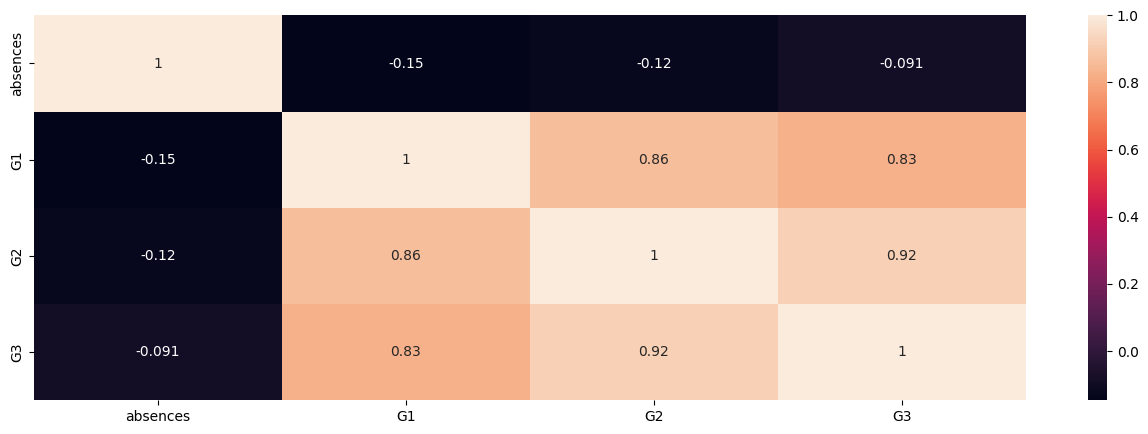

In [ ]:
# Observe nesse mapa de calor:
import seaborn as sns
plt.figure(figsize=(16,5))
sns.heatmap(corr_matrix, annot=True)
plt.show()

O mapa demonstra que G1 e G2 estão bastante relacionadas a G3, enquanto faltas não parecem influenciar nesses 3 atributos.

Isso não significa, necessariamente, que é impossível fazer inferências ou predições usando esses atributos. Ainda assim, eles podem causar problemas de interpretação dos coeficientes e afetar a precisão das predições.

### **Valor do Fator de Inflação da Variância (VIF)**

Uma medida que é utilizada para avaliar empiricamente a existência de Multicolinearidade é o Valor do Fator de Inflação da Variância (VIF). É uma medida que indica o grau de multicolinearidade entre as variáveis independentes em um modelo de regressão linear.

Em termos simples, o VIF mostra quanto a variância de um coeficiente específico é aumentada devido à multicolinearidade com as outras variáveis.

Interpretamos o **VIF** da seguinte maneira:

Um VIF de 1 indica ausência de multicolinearidade.
Geralmente, um VIF entre 1 e 5 é considerado aceitável.
Um VIF acima de 5 pode indicar a presença de multicolinearidade.

**Observe:**

G1: O VIF de G1 é relativamente baixo, indicando que não há forte multicolinearidade entre G1 e as outras variáveis.

G2: O VIF de G2 é mais alto, indicando que há uma quantidade significativa de multicolinearidade entre G2 e as outras variáveis.

G3: G3 também tem um VIF relativamente alto, sugerindo multicolinearidade com outras variáveis.

const: A constante adicionada para calcular o VIF tem um VIF muito alto. Isso pode ser devido à multicolinearidade entre as variáveis independentes, incluindo a constante.


### O que isso significa?


O VIF geralmente é comparado com um limite específico (por exemplo, 5) para avaliar a presença de multicolinearidade. Neste caso, os valores de VIF para G2 e G3 podem ser considerados relativamente altos, sugerindo multicolinearidade significativa.

Como explicamos, a multicolinearidade pode afetar a interpretação dos coeficientes de regressão, tornando-os instáveis e difíceis de interpretar.

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supondo que 'data_por' seja seu DataFrame
# Selecione as variáveis G1, G2 e G3
selected_vars = data_por[['G1', 'G2', 'G3']]

# Adicione uma constante para calcular o VIF
X_with_const = pd.concat([selected_vars, pd.Series(1, index=selected_vars.index, name='const')], axis=1)

# Calculando o VIF para cada variável
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Exibindo os resultados
print(vif_data)


  Variable        VIF
0       G1   4.076454
1       G2   8.271475
2       G3   6.568642
3    const  18.858898


# **Fim**
Parabéns, voce chegou ao fim desse tutorial! Esperamos que você tenha aprendido bastante e que o conteúdo tenha sido útil em sua jornada.

Nesse estudo, utilizamos duas ferramentas muito importantes para a Estatística e Ciência de Dados no geral: O Google Colaboratory (ou Colab) e Python. Recomendamos também que o aluno pesquise e se familiarize com ferramentas como R e Matlab, para se tornar mais versado em suas habilidades.

## Fontes:

RYU, Thomas. Variáveis Dummy: o que é? Quando usar? E como usar?. Medium: 2019. Disponível em: https://medium.com/data-hackers/vari%C3%A1veis-dummy-o-que-%C3%A9-quando-usar-e-como-usar-78de66cfcca9#:~:text=Vari%C3%A1veis%20dummy%20s%C3%A3o%20vari%C3%A1veis%20bin%C3%A1rias%20%280%20ou%201%29,dummy_sexo%20%3D%201%20em%20caso%20de%20sexo%20feminino. Acesso em: 9 nov. 2023.

Silva, Elaine. O que é multicolinearidade?. Medium: 2023. Disponível em https://medium.com/@lainetnr/o-que-%C3%A9-multicolinearidade-e4adff76345a. Acesso em: 9 nov. 2023.

MIREIA, Irina & RUIZ, Raquel. Teste de Hipóteses: o que significa, quais são os tipos e como realizar um teste de hipóteses. Turing Talks: 2022. Disponível em https://medium.com/turing-talks/teste-de-hip%C3%B3teses-o-que-significa-quais-s%C3%A3o-os-tipos-e-como-realizar-um-teste-de-hip%C3%B3teses-1decda841bcd. Acesso em: 9 nov. 2023.

JÚNIOR, Clébio de Oliveira. Entendendo as métricas R², MAE, MAPE, MSE e RMSE. Data Hackers: Dez. 2021. Disponível em https://medium.com/data-hackers/prevendo-n%C3%BAmeros-entendendo-m%C3%A9tricas-de-regress%C3%A3o-35545e011e70#:~:text=A%20m%C3%A9trica%20R%C2%B2%2C%20tamb%C3%A9m%20conhecida%20como%20R-dois%20ou,percentuais%2C%20ou%20seja%2C%20variando%20entre%200%25%20e%20100%25. Acesso em: 9 nov. 2023.

Python Scikit-Learn. Disponível em https://scikit-learn.org/stable/. Acesso em 10 nov. 2023.

Minaei-Bidgoli B.; Kashy D.; Kortemeyer G.; and
Punch W., 2003. Predicting student performance: an
application of data mining methods with an educational web-based system. In Proc. of IEEE Frontiers in Education. Colorado, USA, 13–18. Acesso em 12 nov. 2023.

Hastie T.; Tibshirani R.; and Friedman J., 2001. The
Elements of Statistical Learning: Data Mining, Infererence, and Prediction. Springer-Verlag, NY, USA. Acesso em 12 nov. 2023.

Cortez, Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T. Acesso em 12 nov. 2023.

Student-Grades-Prediction, por Shwetago. Disponível em https://github.com/Shwetago/Student-grades-prediction/blob/master/Predicting_student_grades.ipynb. Acesso em 16 nov. 2023.


Student-Performance-Prediction, por RohithYogi. Disponível em https://github.com/RohithYogi/Student-Performance-Prediction/blob/master/README.md.Último acesso em 17 nov. 2023.

Student Performance, por Ben Gruher. Disponível em https://github.com/bengruher/Student-Performance-Prediction/blob/master/README.md. Último acesso em 17 nov. 2023.